In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

%matplotlib inline

In [2]:
customer_data = pd.read_csv('C:\\Users\\Jacob Kai\\Documents\\Data Analysis\\Mall_Customers.csv')
customer_data

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
customer_data.isna().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [4]:
X = customer_data[['Annual_Income_(k$)', 'Spending_Score']]
X

,Annual_Income_(k$),Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


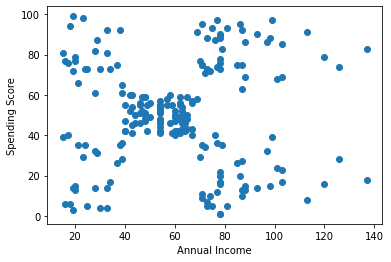

In [5]:
plt.scatter(customer_data['Annual_Income_(k$)'],customer_data['Spending_Score'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

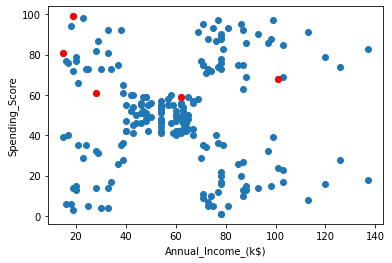

In [6]:
K=5
centroids = customer_data.sample(n=K)
plt.scatter(customer_data['Annual_Income_(k$)'],customer_data['Spending_Score'])
plt.scatter(centroids['Annual_Income_(k$)'],centroids['Spending_Score'], c='red')
plt.xlabel('Annual_Income_(k$)')
plt.ylabel('Spending_Score')
plt.show()

In [7]:
diff = 1
j = 0

while(diff != 0):
    XD = X
    i = 1
    for index1, row_c in centroids.iterrows():
        ED = []
        for index2, row_d in XD.iterrows():
            d1 = (row_c['Annual_Income_(k$)'] - row_d['Annual_Income_(k$)']) ** 2
            d2 = (row_c['Spending_Score'] - row_d['Spending_Score']) ** 2
            d = sqrt(d1+d2)
            ED.append(d)
        X[i] = ED
        i = i+1

    C = []
    for index3, row in X.iterrows():
        mid_dist = row[1]
        pos = 1
        for i in range(K):
            if row[i+1] < mid_dist:
                mid_dist = row[i+1]
                pos = i+1
        C.append(pos)
    X["Cluster"] = C
    
    centroids_new = X.groupby('Cluster').mean()[['Annual_Income_(k$)', 'Spending_Score']]
    if j == 0:
        diff = 1
        j = j+1
    else:
        diff = (centroids_new['Annual_Income_(k$)'] - centroids['Annual_Income_(k$)']).sum() + (centroids_new['Spending_Score'] - centroids['Spending_Score']).sum()
        print(diff.sum()) #有sum()或沒有都可以，type(diff) --> numpy.int64
        
    centroids = X.groupby('Cluster').mean()[['Annual_Income_(k$)', 'Spending_Score']]

C:\Users\JACOBK~1\AppData\Local\Temp/ipykernel_8348/1118114473.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = ED


-12.320099789288506
1.6622191851295867
-4.816422911196447
-11.520885110742654
-7.432454441354672
0.06694679495507216
-0.4039676656429769
1.4501521838192204
0.0


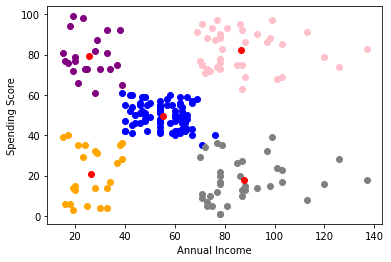

In [8]:
color = ['blue', 'orange', 'gray', 'pink', 'purple']
for k in range(K):
    data = X[X['Cluster'] == k+1]
    plt.scatter(data['Annual_Income_(k$)'], data['Spending_Score'], c=color[k])
plt.scatter(centroids['Annual_Income_(k$)'],centroids['Spending_Score'], c='red')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()